# Support Vector Machine (SVM) - Kernels
**Notebook 2 of 4**

In this tutorial we'll introduce kernels. A `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

In the context of SVMs, there are 4 popular kernels – `Linear kernel`, `Polynomial kernel` and `Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`.  

SVMs are powerful supervised machine learning algorithms that excel at classification and regression tasks. In this workshop, we'll dive into data points are so dispersed that it is not possible to separate them using a linear hyperplane.

In this project, a Support Vector Machine classifier to classifies a Pulsar star. I have used the **Predicting a Pulsar Star** dataset for this project. But where do we get our data? The University of California Irvine's Open Data website has a small data sets suitable to get our training data and test data. We have already downloaded the dataset and you can find it in the tutorial repository.  It is also available [Here](https://archive.ics.uci.edu/dataset/372/htru2)
This dataset is useful for SVM kernels for the following reasons:
#### The problem with dispersed or unbalanced datasets
Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 

Comment: Please explain what is a linear hyperplane or mention it will be explian under the terminology seciton in this training. 

In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.

Comment: what are we seeing below in 1, 2, ..., 6? please explain. 

1. **Binary Classification Task**: Imagine you have a bunch of objects, like stars, and you want to sort them into two groups: pulsars (special stars that emit pulses of radiation) and non-pulsars (regular stars that don't emit pulses). So, the goal is to tell if a star is a pulsar or not.
 
2. **Non-linear Decision Boundaries**: Think of drawing a line or a curve to separate the pulsars from the non-pulsars on a graph. Sometimes, you need a wavy or curvy line instead of a straight one. SVMs are good at figuring out these wavy lines, which helps in separating different kinds of stars accurately.
 
3. **Feature Space Transformation**: Think of features as characteristics of stars, like their brightness or size. SVMs can change the way they look at these characteristics to make it easier to tell the difference between pulsars and non-pulsars.
 
4. **Robustness to Overfitting**: Sometimes, we don't want the computer to memorize all the examples we show it because it might not work well on new stars it hasn't seen before. SVMs are good at finding a balance between learning from examples and not memorizing them too much.
 
5. **Interpretability and Simplicity**: SVMs make their decisions based on only a few examples, which makes it easier for us to understand why they classify stars the way they do. This is helpful when we want to explain why a star is classified as a pulsar or not.
 
6. **Availability of Libraries**: There are computer tools available that make it easy for people to use SVMs to study stars without needing to know all the complicated math behind it. These tools help scientists and students work with pulsar data more easily.
 
In simple terms, using SVMs to study pulsar data helps scientists figure out which stars are pulsars and which ones are not by drawing clever lines or curves between them on a graph, while still keeping things simple and easy to understand.

Following is a quick description of the information contained in the dataset: <br>
As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a ‘candidate’, is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

## Learning Objectives

Average time to complete: 30min

By the end of this tutorial you should be able to:

- Understand the basic concept of Support Vector Machines (SVMs) and their role in supervised learning.
- Learn about the significance of kernels in SVMs and how they enable handling non-linear data.
- Explore common types of kernels like linear, polynomial, and radial basis function (RBF).
- Gain practical experience in implementing SVM kernels using a programming language like Python with scikit-learn.
- Understand the concept of kernel selection and tuning for optimal SVM performance.
- Learn about model evaluation techniques, such as cross-validation, for assessing SVM kernel performance

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it. 

We also need to respect a few research data management best practices along the way, these best practices are recommended by the [Digital Research Alliance of Canada](https://zenodo.org/records/4000989).

SAVE YOUR RAW DATA IN ORIGINAL FORMAT
* Don't overwrite your original data with a cleaned version.
* Protect your original data by locking them or making them read-only.
* Refer to this original data if things go wrong (as they often do).

BACKUP YOUR DATA
* Use the 3-2-1 rule: Save three copies of your data, on two different storage mediums, and one copy off site. The off site storage can be OneDrive or Google drive or whatever your institution provides.
* We are using Open Data, so it does not contain any personally identifiable data or data that needs to be restricted or protected in any way. However, if your data contains confidential information, it is important to take steps to restrict access and encrypt your data.

There are a few more RDM best practices that will help you in your project management, and we will highlight them at the beginning of each tutorial.

### 1. Review of SVM terminology. 
Before getting started, let's do a cursory review of the concepts covered so far.

#### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


#### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.

#### Margin

A margin is a perpendicular separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.
<img src="Margin.png" style="float: left;" alt="" height="400" width="400"/><br><br>
    - Best optimized line(hyperplane) with maximum margin is termed as Margin Maximal Hyperplane (shown as solid line)<br>
    - Closest points where the margin distance is calculated are considered as the support vectors (shown as dotted lines)<br>
    - The 2 arrows denote the hyperplane. In this case it is maximized because it is between the closest data points.
<br><br>
#### Regularization
- Known as the 'C' parameter in Python SkLearn Library
- Optimises SVM classifier to avoid misclassifying the data
- C large -> Margin of hyperplane small
- C small -> Margin of hyperplane large
- Misclassification are possible:
    - A large C can lead to overfitting
    - A small C can lead to underfitting

## 2. Introduction to Kernel trick


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

In the context of SVMs, there are 4 popular kernels – `Linear kernel`, `Polynomial kernel` and `Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

## Cleaning your data

We will use Pandas library for our data cleaning since it has veryful power filtering and manipulation tools to get our data formatted to allow for easy analysis. When you use data from other sources the data cleaning process can be time consuming, but it is an important step to ensure that your results are accurate. 

#### pulsar star data

The very first step in data cleaning, is reading the data! Make sure you have "pulsar_stars.csv" that should have come with this notebook. If you don't have it, you can download it from the link in the comment below.

## 3.Import dataset

In [4]:
data = './pulsar_stars.csv'

df = pd.read_csv(data)

## 4. Let's explore the data.  Exploratory data analysis


Now, we will explore the data to gain insights about the data. 

In [5]:
# view dimensions of dataset

#df.shape

The data has now been read by Pandas and stored in the variable dataset so we can now use it in our notebook.
Let's see that we have in our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


The column names are easily understandable and follow good RDM best practices. This clear documentation of the variables as they correspond to the data collection process helps us to reuse this data!

The summary explains that these columns represent measurements of signals from outer space data.

*Non-null* values are the number of flowers that were measured and classified by their species.<br>

*float64* values indicate double precision 64-bit decimal point number meaning they can take very large or small numbers.<br>

*int64* values indicate single precision 32-bit integer number<br>

Notice that we have 17,898 entries, and if we look at the measurements, we see we have 17,898 non-null values. *This indicates no missing data!* We also notice that the datatypes for the measurements are all numerical.  This is important since performing math functions can only work with numerical data. 

Note that missing data is fairly typical for raw datasets.

Fortunately, we don't have to deal with missing data here.  Visualization is a powerful tool to check the data because it lets you see at a glance if anything weird might be going on.

This requires some level of understanding of the data you are working with. For complicated datasets, visualizations can be quite difficult and would require some domain expertise, but it pays off to visualize because of the insights that it can bring.

In this case, we are measuring in a very spacialized area of study, so this is an example where the results would have to be analyzed and interpreted by the Subject Matter Expert (SME)! Since we are not using this data for research here, we can go with our curiosity. Let's plot some of the data.


In [7]:
round(df.describe(),2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


We can see that there are 9 variables (features) and 17,898 samples in the dataset. 8 are continuous variables and 1 is discrete variable (0 or 1). The discrete variable is `target_class` variable. `target_class` is also the target variable (Pulsar star Y/N - 1 or 0). Note that on close inspection, we can suspect that all the continuous variables may contain outliers.  This comes from comparing the distances between the minimum and maximum values with the 25%, 50% and 75% percentiles.  We will check this further once the dataset is clean.

Now, let's view the column names to check for leading and trailing spaces.

In [8]:
# view the column names of the dataframe
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, we will remove these leading spaces.

In [9]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

Removed the leading spaces from the column names. Let's again view the column names to confirm the same.

In [10]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. Although the naming follows good RDM practices, the name very long for coding. So, we will shorten them while attempting to keep the intuitive meaning.

In [11]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'Is_pulsar']

In [12]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'Is_pulsar'],
      dtype='object')

We can see that the column names are shortened. IP stands for `integrated profile` and DM-SNR stands for `delta modulation and signal to noise ratio`. Now, it is much easier to work with the columns.

Our target variable is the `target_class` column. So, I will check its distribution.

In [13]:
# check distribution of target_class column

#df['target_class'].value_counts()

In [14]:
# view the percentage distribution of target_class column

#df['target_class'].value_counts()/np.float(len(df))
df['Is_pulsar'].value_counts()/float(len(df))

0    0.908426
1    0.091574
Name: Is_pulsar, dtype: float64

We can see that percentage of observations of the class label `0` and `1` is 90.84% and 9.16%. 

In [15]:
# view summary of dataset

#df.info()

Let's check for missing values in variables

In [16]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
Is_pulsar          0
dtype: int64

We can see that there are no missing values in the dataset and all the variables are numerical variables.

### Summary of numerical variables

- There are 9 numerical variables in the dataset.

- 8 are continuous variables and 1 is discrete variable. 

- The discrete variable is `target_class` variable. It is also the target variable.

- There are no missing values in the dataset.

Our dataset is cleaned

### Outliers in numerical variables

Identifying outliers in a dataset is important when evaluating the kernel in Support Vector Machines (SVMs) for several reasons:
 
1. **Impact on Decision Boundary**: Outliers can significantly influence the position and shape of the decision boundary learned by the SVM. They may pull the decision boundary towards them, affecting its generalization to unseen data. Identifying and properly handling outliers can help ensure that the decision boundary is robust and accurately represents the underlying patterns in the data.
 
2. **Model Performance**: Outliers can distort the performance metrics of the SVM model. For example, if outliers are misclassified, they can artificially inflate error rates or reduce accuracy. By identifying and addressing outliers, one can obtain a more realistic assessment of the SVM's performance.
 
3. **Robustness**: Outliers can make the model less robust to noise in the data. Since SVMs aim to maximize the margin between classes, outliers that lie close to the decision boundary can lead to a reduction in margin size, potentially increasing the risk of overfitting. By identifying outliers, one can mitigate the risk of overfitting and improve the model's generalization performance.
 
4. **Computational Efficiency**: Outliers can increase the computational complexity of training the SVM model, particularly when using kernels that involve pairwise comparisons between data points. By removing or properly handling outliers, one can improve the efficiency of the training process without sacrificing model performance.
 
5. **Interpretability**: Outliers may represent anomalies or rare instances in the data that are of particular interest for interpretation. By identifying outliers, one can better understand the characteristics of the data and potentially gain insights into unusual patterns or phenomena present in the dataset.
 
Overall, identifying outliers in the dataset when evaluating the kernel in SVMs is crucial for ensuring model robustness, performance, computational efficiency, and interpretability. It helps in creating a more accurate and reliable SVM model that effectively captures the underlying structure of the data.


Box plots are graphical representations that provide a visual summary of the distribution of a dataset. They are particularly useful for understanding the impact of outliers on a dataset in the following ways:
 
Box plots help visualize and understand the impact of outliers on a dataset by providing a clear summary of the distribution, facilitating the identification of outliers, comparing distributions between groups, assessing skewness, and understanding the spread and dispersion of the data. They are robust visualizations that enable quick and intuitive insights into the presence and effect of outliers in a dataset.

Let's draw boxplots to visualise outliers in the above variables. 

In [17]:
# view summary statistics in numerical variables

#round(df.describe(),2)

Text(0, 0.5, 'DM-SNR Skewness')

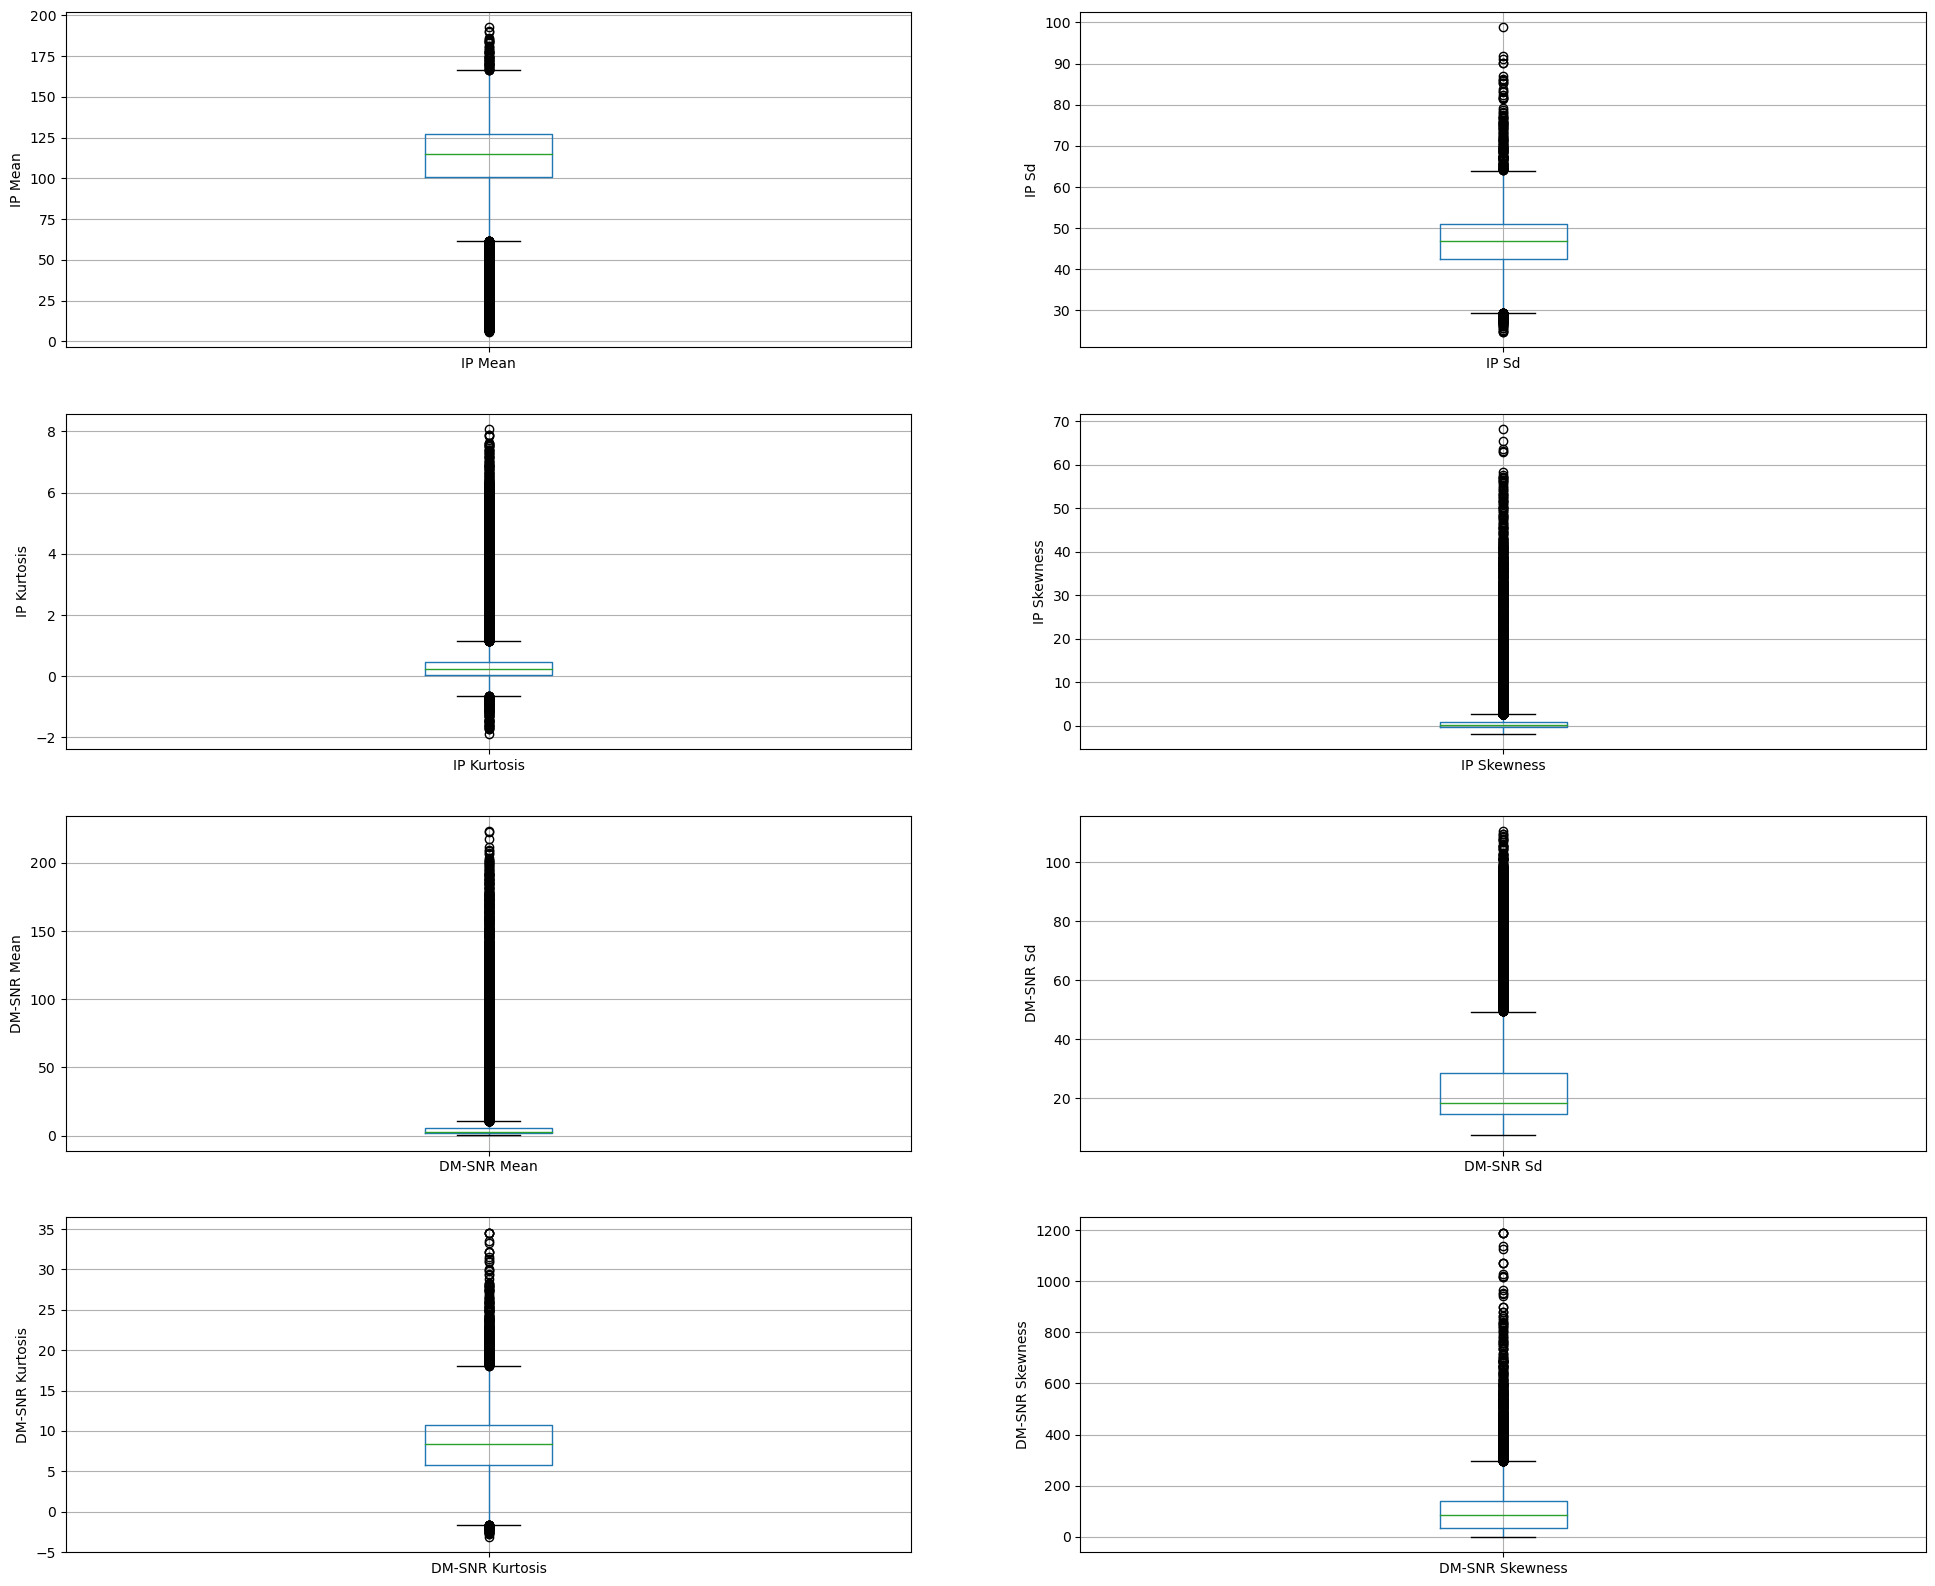

In [19]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

The above boxplots confirm that there are lot of outliers in these variables. Several distributions are skewed, the median is not in the middle of the box, and instead off to the side. You also find an imbalance in the whisker lengths, where one side is short with no outliers, and the other has a long tail with many more outliers

### Handling outliers with SVMs


As we saw in notebook 1, there are 2 variants of SVMs. They are `hard-margin variant of SVM` and `soft-margin variant of SVM`.


The `hard-margin variant of SVM` does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.


Another version of SVM is called `soft-margin variant of SVM`. In this case, we can have a few points incorrectly classified or 
classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of `C` parameter, which controls the outliers. `Low C` implies we are allowing more outliers and `high C` implies less outliers.


The reasoning is that since the dataset contains outliers, we should expect a higher value of `C` to be beneficial when training the model.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. 

Text(0, 0.5, 'Number of pulsar stars')

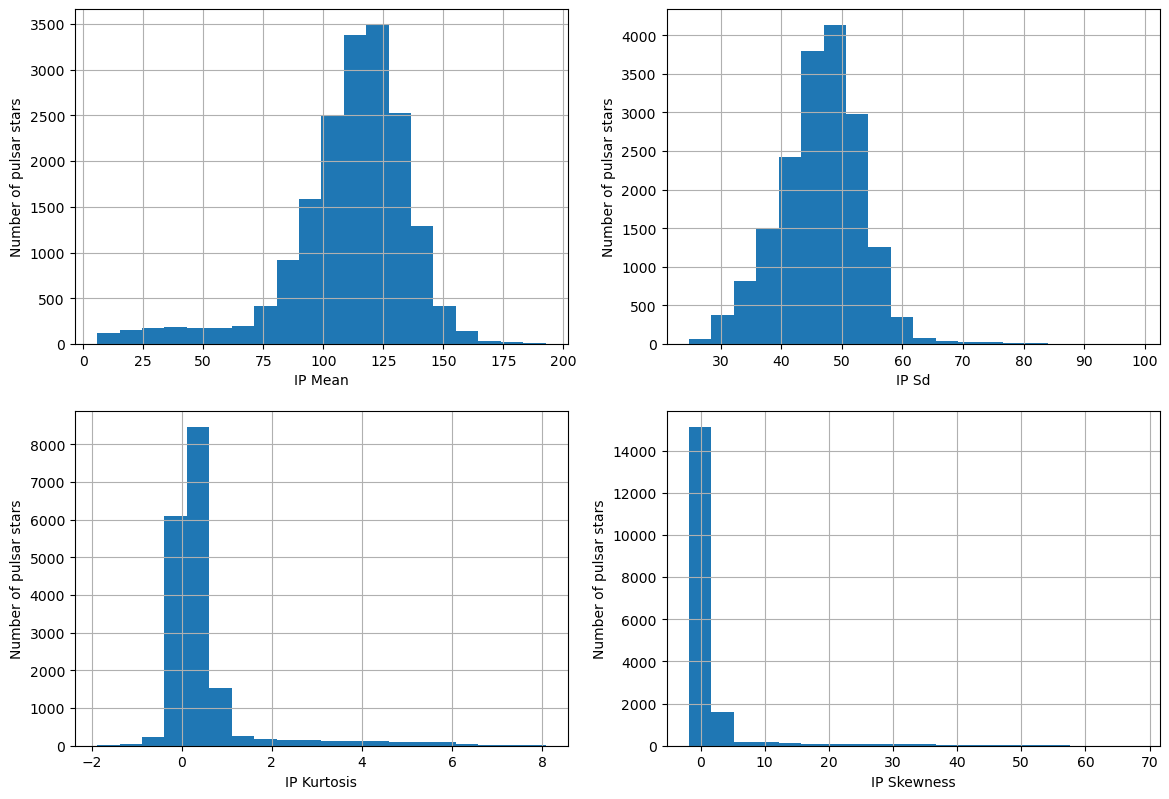

In [20]:
# plot histogram to check distribution

plt.figure(figsize=(14,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')


Text(0, 0.5, 'Number of pulsar stars')

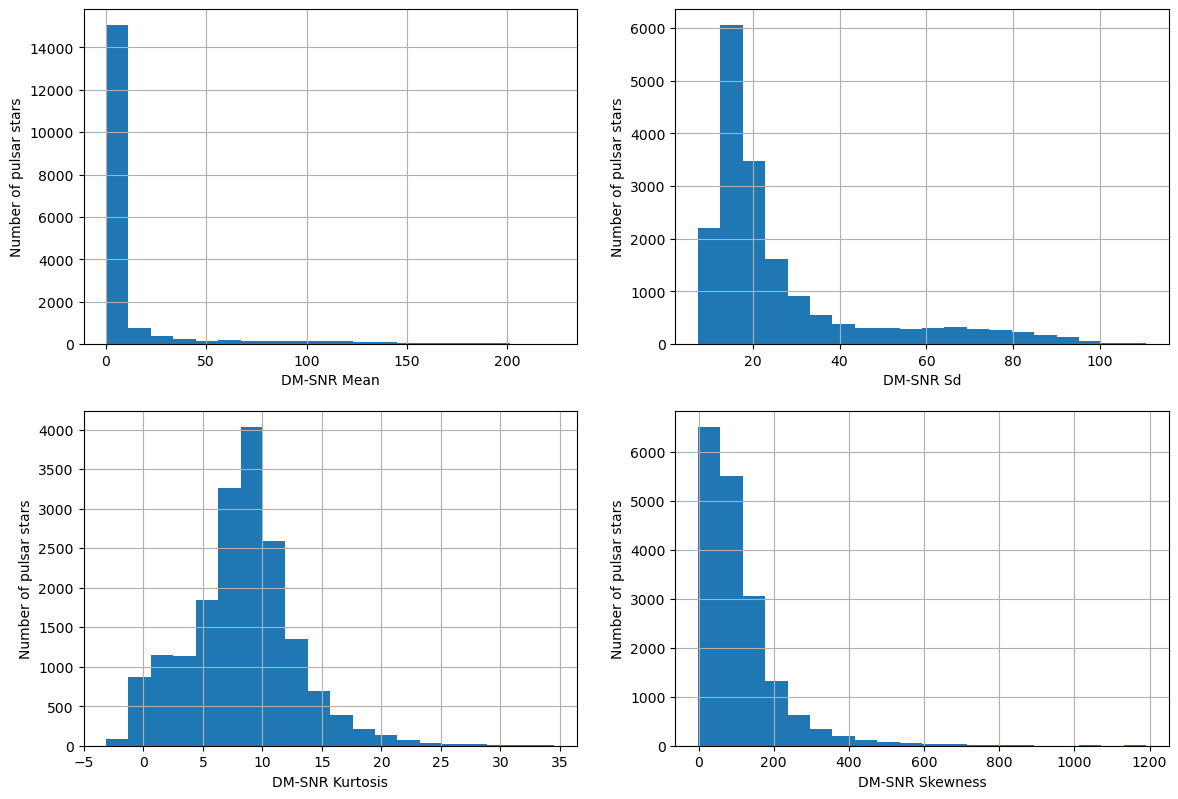

In [21]:
plt.figure(figsize=(14,20))

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

As suspected from the early data exploration and box plots, we can see that all the 5 continuous variables are highly skewed while IP Mean, IP SD and DM-SNR Kurtosis are fairly well distributed.

## 5. Declare feature vector and target variable

To use the classifier, we have to create our training data and test data variables.

For the training data, we have<br>
    - X variables (model inputs): 'IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'<br>
    - Y variable (model ouput): Is_pulsar - yes(1) or no (0)
    
For the test data, we have<br>
    - X variables (model inputs): 'IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'<br>
    - Y variable (model ouput): Is_pulsar - yes(1) or no (0)
    
Our X variables are all the measurable signal properties.<br>
Our Y variable is the whether it is a pulsar or not.<br>
Let's create those by removing the relevant columns.

In [22]:
X = df.drop(['Is_pulsar'], axis=1)

y = df['Is_pulsar']

## 6. Split data into separate training and test set

In [23]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Following the creation of or train and test datasets, we want to do a cursory check 

In [24]:
# check the shape of X_train and X_test

print("Train rows and columns",X_train.shape)
print("Test rows and columns",X_test.shape)

Train rows and columns (14318, 8)
Test rows and columns (3580, 8)


This is what we expect.  The sum of the train and test rows should add up to the 17898 entries we observed earlier and we have the 8 measured properties or features.

## 7. Data Scaling

The scale of your Data matters. Machine learning models learn a mapping from input variables to an output variable. As such, the scale and distribution of the data drawn from the domain may be different for each variable.
Input variables may have different units (e.g. feet, kilometers, and hours) that, in turn, may mean the variables have different scales.

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

For our classifiers, we want our observations to fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation as closely as possible. But we saw that this expectation is not met when we plotted the distributiosn of our variables above. Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean value or centering the data. Standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales or if largely skewed. Fortunately, sklearn has a built-in function to help us do that fairly easily. 

In [22]:
cols = X_train.columns

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [24]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [25]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [26]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


We see that the mean is 0 and the standard deviation is 1. We now have `X_train` and `X_train` datasets ready to be fed into the SVM classifier. 

## 8. Run SVM with default hyperparameters


Default hyperparameter means `C=1.0`,  kernel=`rbf` and gamma=`auto` among other parameters.

In [28]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


### Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of `C` as higher C means fewer outliers. 
So, I will run SVM with kernel=`rbf` and C=100.0.

In [29]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


We can see that we obtain a slightly higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

### Run SVM with rbf kernel and C=1000.0


In [30]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


In this case, we can see that the accuracy had decreased with C=1000.0.  Why?
As we saw in notebook 1, for a very large `C`, the margin is hard, and points cannot lie in it. The classfier doesn't generalize well to new, unseen examples.

## 9. Run SVM with linear kernel


### Run SVM with linear kernel and C=1.0

In [37]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9830


### Run SVM with linear kernel and C=100.0

In [38]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


### Run SVM with linear kernel and C=1000.0

In [39]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

We can see that the predicted set and test set accuracy are very much comparable.

## 10. Run SVM with polynomial kernel


### Run SVM with polynomial kernel and C=1.0

In [31]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


 ### Run SVM with polynomial kernel and C=100.0

In [32]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100 : 0.9824


## 15. Run SVM with sigmoid kernel


### Run SVM with sigmoid kernel and C=1.0

In [33]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


### Run SVM with sigmoid kernel and C=100.0

In [34]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


We can see that sigmoid kernel is performing poorly and accuracies with small and large 'C' are similar. This could be a sign a overfitting but it is very likely that the dataset is linearly separable or has a decision boundary that can be easily found by the SVM Sigmoid model.

### Comments


We get maximum accuracy with `rbf` and `linear` kernel with C=100.0. and the accuracy is 0.9832. Based on the above analysis we can conclude that our classification model accuracy is very good. Is our model doing a good job in terms of predicting the class labels?


Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

Accuracy computes the proportion of correct predictions overall. But with imbalance, we care more about the minority class performance.
- High overall accuracy can be achieved by predicting everything as the majority class.
- Accuracy doesn't differentiate between the types of errors made (false positives vs false negatives). These errors have different costs in skewed datasets.

So, we should explore alternative metrics that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making. 

- Metrics like precision, recall, F1-score, and ROC AUC are better suited for quantifying performance on imbalanced data.


## Please proceed to Notebook 3